# Prototype of matching a catalog of brown dwarfs to one of our summary spreadsheets (NGC1333)

I'd like to figure out how to do something simple: match a single "literature" catalog of brown dwarfs to our summary spreadsheet, print out which objects overlap, confirm (where possible) that the positions and mean magnitudes are consistent, etc.

I'm starting with NGC 1333 (a clean, well-isolated region that is also the closest! hence the brightest brown dwarfs) and in particular the [Previously-Identified Brown Dwarfs from Scholz 2012a (Table 4)](https://iopscience.iop.org/article/10.1088/0004-637X/744/1/6#apj406982t4). Before I get too deep, I want to see what matching a *single* table to a *single* dataset looks like. This one has, like, 40 members, so that's plenty to see (statistically) the most common situations we'll see.

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import astropy.table
from astropy.coordinates import SkyCoord
from astropy import units as u

from wuvars.data import spreadsheet, photometry
from wuvars.plotting.lightcurve import simple_lc

spread = spreadsheet.load_v1()
phot_grouped = photometry.load_v1_grouped()



Loading WSERV1 photometry data... DONE (elapsed time: 2.63s)
Loading WSERV5 photometry data... DONE (elapsed time: 0.24s)
Loading WSERV7 photometry data... DONE (elapsed time: 1.68s)
Loading WSERV8 photometry data... DONE (elapsed time: 0.77s)
Loading WSERV11 photometry data... DONE (elapsed time: 0.68s)
Grouping WSERV1 photometry data... DONE (elapsed time: 29.96s)
Grouping WSERV5 photometry data... DONE (elapsed time: 3.70s)
Grouping WSERV7 photometry data... DONE (elapsed time: 3.66s)
Grouping WSERV8 photometry data... DONE (elapsed time: 2.64s)
Grouping WSERV11 photometry data... DONE (elapsed time: 4.79s)


In [3]:
# load up the Scholz table.

# it lives...
aux_path = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/data/auxiliary_catalogs/NGC1333"
filepath = os.path.join(aux_path, "Scholz_2012ApJ_744_6S_table4.fit")

# load up our data.
table = astropy.table.Table.read(filepath)

# Do some catalog matching.
# (possibly: see https://docs.astropy.org/en/stable/coordinates/matchsep.html)

table_coordinates = SkyCoord(ra=table['RAJ2000'], dec=table['DEJ2000'])

table

<Table masked=True length=41>
       ID          RAJ2000     DEJ2000   ...     SimbadName     recno  
                     deg         deg     ...                           
    bytes16        float64     float64   ...      bytes17       int32  
---------------- ----------- ----------- ... ----------------- --------
 SONYC-NGC1333-1    52.19858    31.36517 ...  SONYC NGC 1333-1        1
 SONYC-NGC1333-2    52.22883    31.25806 ...  SONYC NGC 1333-2        2
 SONYC-NGC1333-3    52.23017    31.29317 ...  SONYC NGC 1333-3        3
 SONYC-NGC1333-4    52.23542    31.26753 ...  SONYC NGC 1333-4        4
 SONYC-NGC1333-5    52.23725    31.34686 ...  SONYC NGC 1333-5        5
 SONYC-NGC1333-6    52.23796    31.32000 ...  SONYC NGC 1333-6        6
 SONYC-NGC1333-7    52.24342    31.38242 ...  SONYC NGC 1333-7        7
 SONYC-NGC1333-8    52.26412    31.31108 ...  SONYC NGC 1333-8        8
 SONYC-NGC1333-9    52.27308    31.17061 ...  SONYC NGC 1333-9        9
             ...         ...         ... ...               ...      ...
            Sp49    52.19925    31.28200 ...      [GMM2008] 49       32
            Sp53    52.21721    31.26308 ...      [GMM2008] 53       33
            Sp55    52.22042    31.27400 ...      [GMM2008] 55       34
            Sp58    52.22529    31.28175 ...      [GMM2008] 58       35
            Sp94    52.28950    31.45581 ...      [GMM2008] 94       36
           Sp105    52.30429    31.29397 ...     [GMM2008] 105       37
           Sp131    52.40721    31.36733 ...     [GMM2008] 131       38
           Sp157    52.30329    31.33547 ...     [GMM2008] 157       39
           Sp177    52.35346    31.40172 ...     [GMM2008] 177       40
            Sp71    52.24267    31.36725 ...      [GMM2008] 71       41

In [4]:
# from wuvars.data.spreadsheet import v1 as spread

In [5]:
spread.wserv7

mean                                              \
                  MEANMJDOBS        RA       DEC JMHPNT JMHPNTERR HMKPNT   
SOURCEID                                                                   
44508746088477  56321.341063  0.910652  0.549810    NaN       NaN    NaN   
44508746088478  56245.959948  0.906570  0.549800    NaN       NaN    NaN   
44508746088482  56261.423467  0.906562  0.549801    NaN       NaN    NaN   
44508746088484  56348.243262  0.910643  0.549817    NaN       NaN    NaN   
44508746088487  56227.052779  0.908796  0.549826    NaN       NaN    NaN   
...                      ...       ...       ...    ...       ...    ...   
44508746139098  56232.378308  0.907780  0.539243    NaN       NaN    NaN   
44508746139125  56228.274485  0.907504  0.540028    NaN       NaN    NaN   
44508746139158  56228.404004  0.907324  0.539417    NaN       NaN    NaN   
44508746139174  56237.473112  0.907250  0.538432    NaN       NaN    NaN   
44508746139200  56261.931775  0.907056  0.540608    NaN       NaN    NaN   

                                                            ...      count  \
               HMKPNTERR JAPERMAG3 JAPERMAG3ERR  HAPERMAG3  ... N_J_severe   
SOURCEID                                                    ...              
44508746088477       NaN       NaN          NaN        NaN  ...        0.0   
44508746088478       NaN       NaN          NaN        NaN  ...        0.0   
44508746088482       NaN       NaN          NaN        NaN  ...        0.0   
44508746088484       NaN       NaN          NaN        NaN  ...        0.0   
44508746088487       NaN       NaN          NaN        NaN  ...        0.0   
...                  ...       ...          ...        ...  ...        ...   
44508746139098       NaN       NaN          NaN        NaN  ...        0.0   
44508746139125       NaN       NaN          NaN  18.967148  ...        0.0   
44508746139158       NaN       NaN          NaN        NaN  ...        0.0   
44508746139174       NaN       NaN          NaN  19.569693  ...        0.0   
44508746139200       NaN       NaN          NaN        NaN  ...        0.0   

                                     variability                          \
               N_H_severe N_K_severe J_red_chisq H_red_chisq K_red_chisq   
SOURCEID                                                                   
44508746088477        0.0        0.0        -0.0    -0.00000   -0.000000   
44508746088478        0.0        0.0        -0.0    -0.00000   -0.000000   
44508746088482        0.0        0.0        -0.0    -0.00000   -0.000000   
44508746088484        0.0        0.0        -0.0    -0.00000   -0.000000   
44508746088487        0.0        0.0        -0.0    -0.00000   -0.000000   
...                   ...        ...         ...         ...         ...   
44508746139098        0.0        0.0        -0.0    -0.00000    1.217973   
44508746139125        0.0        0.0        -0.0     1.75644         NaN   
44508746139158        0.0        0.0        -0.0    -0.00000    0.755624   
44508746139174        0.0        0.0        -0.0         NaN    1.171153   
44508746139200        0.0        0.0        -0.0    -0.00000    0.646643   

                                                             
               Stetson_HK Stetson_JK Stetson_JH Stetson_JHK  
SOURCEID                                                     
44508746088477        NaN        NaN        NaN         NaN  
44508746088478        NaN        NaN        NaN         NaN  
44508746088482        NaN        NaN        NaN         NaN  
44508746088484        NaN        NaN        NaN         NaN  
44508746088487        NaN        NaN        NaN         NaN  
...                   ...        ...        ...         ...  
44508746139098        NaN        NaN        NaN         NaN  
44508746139125        NaN        NaN        NaN         NaN  
44508746139158        NaN        NaN        NaN         NaN  
44508746139174        NaN        NaN        NaN         N

In [6]:
w7m = spread.wserv7['mean']
spreadsheet_coordinates = SkyCoord(ra=w7m['RA'].values*u.rad, dec=w7m['DEC'].values*u.rad)

In [7]:
spreadsheet_coordinates

<SkyCoord (ICRS): (ra, dec) in deg
    [(52.17649947, 31.5017808 ), (51.94264818, 31.50124013),
     (51.94216362, 31.50129143), ..., (51.98582133, 30.90632458),
     (51.98160001, 30.84986614), (51.97048545, 30.97458274)]>

In [8]:
idx, d2d, d3d = table_coordinates.match_to_catalog_sky(spreadsheet_coordinates)

In [9]:
idx

array([16882,  8299, 12467,  8242, 12488, 12489, 12523, 12659,  8609,
       12686, 12707, 12730, 12858, 12803, 12824,  8222, 13027, 13054,
       13062,  4336,  8273,  8295, 12520, 12761, 12916, 12798,  8215,
        8212, 12588, 16620, 16820,  4334,  8275,  8223,  8187, 12734,
       12784, 13085, 12779, 12921, 12521])

In [10]:
matches = w7m.values[idx]


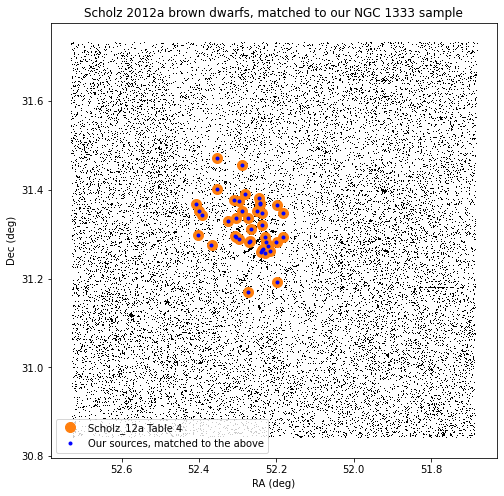

In [11]:
# did our catalog matching work? let's test it.

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(np.degrees(w7m['RA']), np.degrees(w7m['DEC']), 'k,')
ax.plot(table['RAJ2000'], table['DEJ2000'], 'C1o', ms=10, label='Scholz_12a Table 4')
ax.plot(np.degrees(w7m['RA'].values[idx]), np.degrees(w7m['DEC'].values[idx]), 'b.', label='Our sources, matched to the above')
ax.legend()
ax.set_title("Scholz 2012a brown dwarfs, matched to our NGC 1333 sample")
ax.set_xlabel("RA (deg)")
ax.set_ylabel("Dec (deg)")
ax.invert_xaxis()

Text(0, 0.5, 'Number')

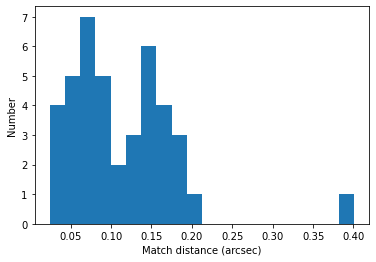

In [12]:
plt.hist(d2d.to(u.arcsec).value, bins=20)
plt.xlabel("Match distance (arcsec)")
plt.ylabel("Number")

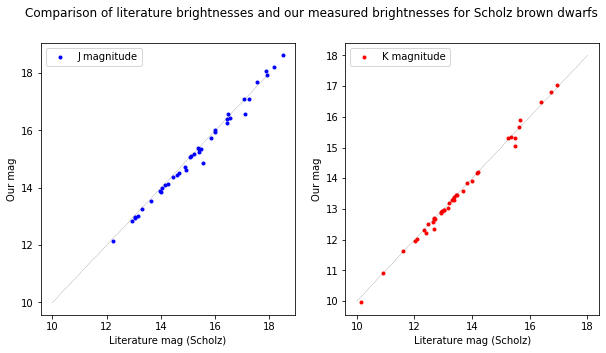

In [13]:
# plotting J, K mags from BD catalog versus J, K mags in our catalog

fig, axes = plt.subplots(ncols=2, figsize=(10,5))

BD_J = table['Jmag']
BD_K = table['Kmag']
us_J = w7m['JAPERMAG3'].values[idx]
us_K = w7m['KAPERMAG3'].values[idx]
axes[0].plot(BD_J, us_J, 'b.', label="J magnitude")
axes[1].plot(BD_K, us_K, 'r.', label="K magnitude")

for ax in axes:
    ax.legend()
    ax.set_xlabel("Literature mag (Scholz)")
    ax.set_ylabel("Our mag")
    ax.plot([10,18], [10,18], 'k:', lw=0.5, alpha=0.7)
    
sup = fig.suptitle("Comparison of literature brightnesses and our measured brightnesses for Scholz brown dwarfs")


In [14]:
d2d[0].to(u.arcsec)

<Angle 0.04571094 arcsec>

In [15]:
# these are the sourceids of the matches
w7m.index[idx]

Int64Index([44508746127488, 44508746107378, 44508746116177, 44508746107277,
            44508746116243, 44508746116250, 44508746116316, 44508746116577,
            44508746107771, 44508746116661, 44508746116731, 44508746116800,
            44508746117256, 44508746117035, 44508746117136, 44508746107212,
            44508746117604, 44508746117645, 44508746117655, 44508746098403,
            44508746107323, 44508746107362, 44508746116313, 44508746116898,
            44508746117422, 44508746117026, 44508746107203, 44508746107200,
            44508746116436, 44508746127117, 44508746127412, 44508746098400,
            44508746107325, 44508746107213, 44508746107153, 44508746116809,
            44508746116999, 44508746117684, 44508746116989, 44508746117427,
            44508746116314],
           dtype='int64', name='SOURCEID')

In [16]:
w7m['JAPERMAG3'].values

array([nan, nan, nan, ..., nan, nan, nan])

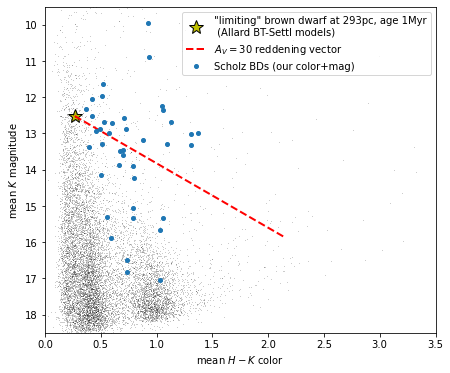

In [17]:
# Color-magnitude diagram?
from wuvars.analysis.bd_mags import apparent_BD_mags_jhk
from wuvars.analysis.variability_selection import sq0

fig, ax = plt.subplots(1, figsize=(7,6))

# rieke & lebofsky 1985 reddening law
A_K = 0.112
A_H = 0.175
E_HK = A_H - A_K # this is like a slope in color-mag space

wserv = 7
J_BDlimit = apparent_BD_mags_jhk[wserv][0]
H_BDlimit = apparent_BD_mags_jhk[wserv][1]
K_BDlimit = apparent_BD_mags_jhk[wserv][2]

h = w7m['HAPERMAG3']
k = w7m['KAPERMAG3']
hmk = h-k

q0 = sq0(spread.wserv7, 80, 160)

ax.plot(
    [H_BDlimit-K_BDlimit],
    [K_BDlimit],
    'y*',
    ms=15,
    markeredgecolor='k',
    label='"limiting" brown dwarf at 293pc, age 1Myr\n (Allard BT-Settl models)',
    scalex=False,
    scaley=False
)

ax.plot(
    [H_BDlimit-K_BDlimit, (H_BDlimit-K_BDlimit) + E_HK*30],
    [K_BDlimit, K_BDlimit + A_K*30],
    'r--', lw=2,
    label='$A_V=30$ reddening vector',
    scalex=False,
    scaley=False
)
ax.plot(hmk[q0], k[q0], 'k,', alpha=0.2)
ax.set_xlim(0, 3.5)
ax.set_ylim(18.5, 9.5)

us_J = w7m['JAPERMAG3'].values[idx]
us_H = w7m['HAPERMAG3'].values[idx]
us_K = w7m['KAPERMAG3'].values[idx]

ax.plot(us_H-us_K, us_K, 'C0.', ms=8, label="Scholz BDs (our color+mag)")

ax.set_xlabel("mean $H-K$ color")
ax.set_ylabel("mean $K$ magnitude")
plt.legend()

Text(0, 0.5, 'Teff3')

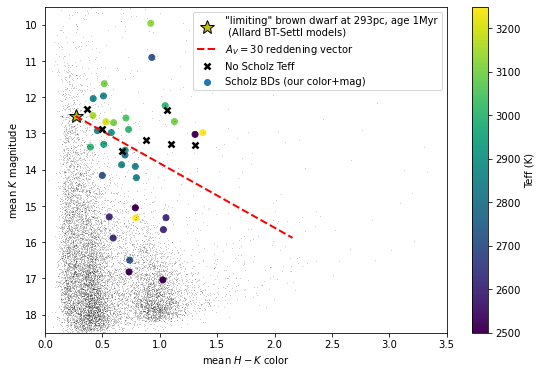

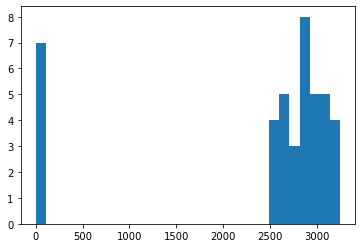

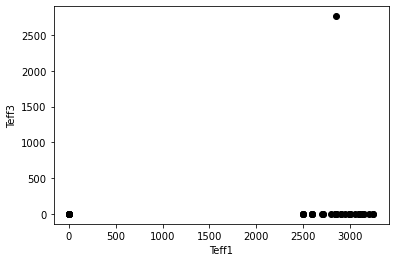

In [18]:
# Color-magnitude diagram?
from wuvars.analysis.bd_mags import apparent_BD_mags_jhk
from wuvars.analysis.variability_selection import sq0

fig, ax = plt.subplots(1, figsize=(9,6))

# rieke & lebofsky 1985 reddening law
A_K = 0.112
A_H = 0.175
E_HK = A_H - A_K # this is like a slope in color-mag space

wserv = 7
J_BDlimit = apparent_BD_mags_jhk[wserv][0]
H_BDlimit = apparent_BD_mags_jhk[wserv][1]
K_BDlimit = apparent_BD_mags_jhk[wserv][2]

h = w7m['HAPERMAG3']
k = w7m['KAPERMAG3']
hmk = h-k

q0 = sq0(spread.wserv7, 80, 160)

ax.plot(
    [H_BDlimit-K_BDlimit],
    [K_BDlimit],
    'y*',
    ms=15,
    markeredgecolor='k',
    label='"limiting" brown dwarf at 293pc, age 1Myr\n (Allard BT-Settl models)',
    scalex=False,
    scaley=False
)

ax.plot(
    [H_BDlimit-K_BDlimit, (H_BDlimit-K_BDlimit) + E_HK*30],
    [K_BDlimit, K_BDlimit + A_K*30],
    'r--', lw=2,
    label='$A_V=30$ reddening vector',
    scalex=False,
    scaley=False
)
ax.plot(hmk[q0], k[q0], 'k,', alpha=0.2)
ax.set_xlim(0, 3.5)
ax.set_ylim(18.5, 9.5)

us_J = w7m['JAPERMAG3'].values[idx]
us_H = w7m['HAPERMAG3'].values[idx]
us_K = w7m['KAPERMAG3'].values[idx]

teff = np.copy(table['Teff1']) * 1.0
teff[teff == 0] = np.nan

sc = ax.scatter(us_H-us_K, us_K, c=teff, label="Scholz BDs (our color+mag)")
ax.plot((us_H-us_K)[np.isnan(teff)], us_K[np.isnan(teff)], 'kx', mew=2.5, label='No Scholz Teff')
cbar = plt.colorbar(sc)
cbar.set_label('Teff (K)')

ax.set_xlabel("mean $H-K$ color")
ax.set_ylabel("mean $K$ magnitude")
plt.legend()

# print(table['Teff1'])
plt.figure()
plt.hist(table['Teff1'], bins=30)

plt.figure()
plt.plot(table['Teff1'], table['Teff3'], 'ko')
plt.xlabel("Teff1")
plt.ylabel("Teff3")

In [83]:
from importlib import reload
import wuvars
reload(wuvars.plotting.lightcurve)
from wuvars.plotting.lightcurve import simple_phased_lc_scatter
from wuvars.plotting.lightcurve import simple_lc_scatter


# Periods!

Below is a super crude shot at period-finding for these.



11 SONYC-NGC1333-12 is SID: 4450 8746 1168 00
FAP of J peak: 3.57e-03. Freq: 0.04 day^-1 (Period: 613.81 hours)
FAP of H peak: 4.59e-03. Freq: 12.04 day^-1 (Period: 1.99 hours)
FAP of K peak: 8.65e-30. Freq: 0.04 day^-1 (Period: 634.92 hours)


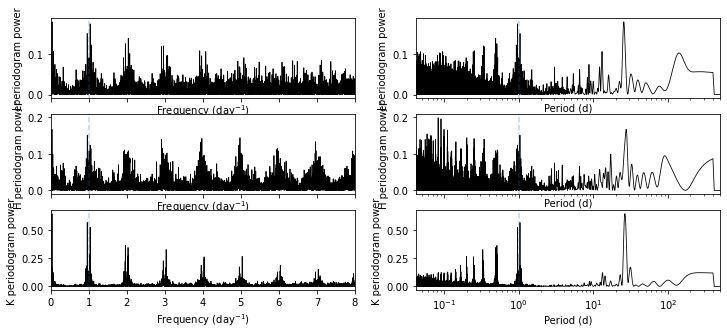

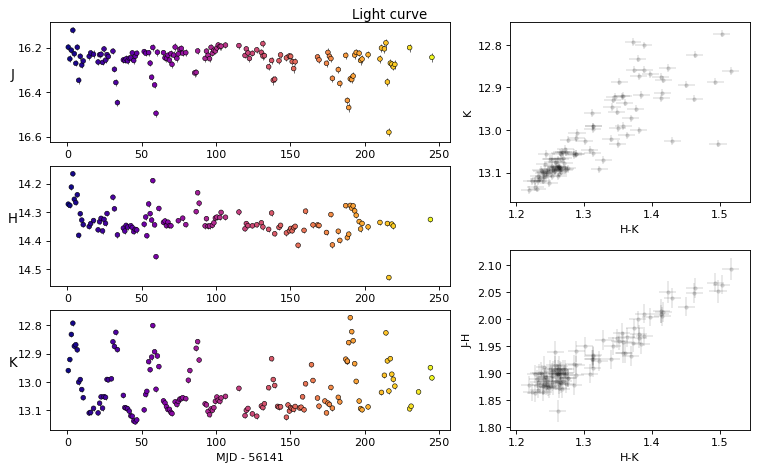

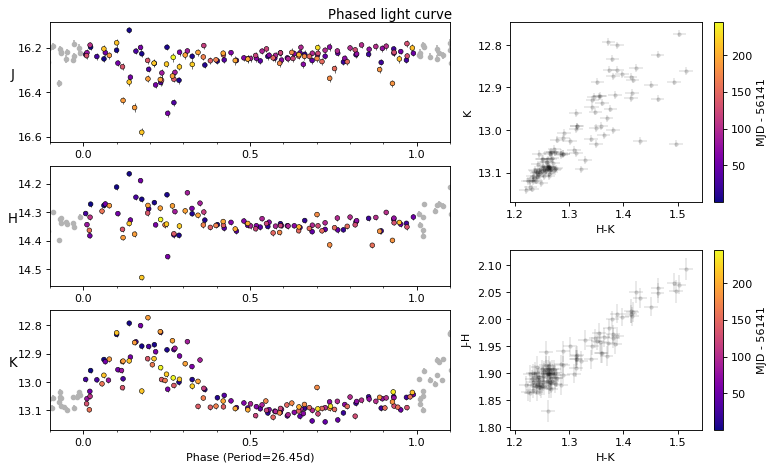



15 SONYC-NGC1333-16 is SID: 4450 8746 1072 12
FAP of J peak: 8.69e-01. Freq: 0.41 day^-1 (Period: 58.22 hours)
FAP of H peak: 4.02e-25. Freq: 0.41 day^-1 (Period: 58.37 hours)
FAP of K peak: 3.18e-24. Freq: 0.41 day^-1 (Period: 58.38 hours)


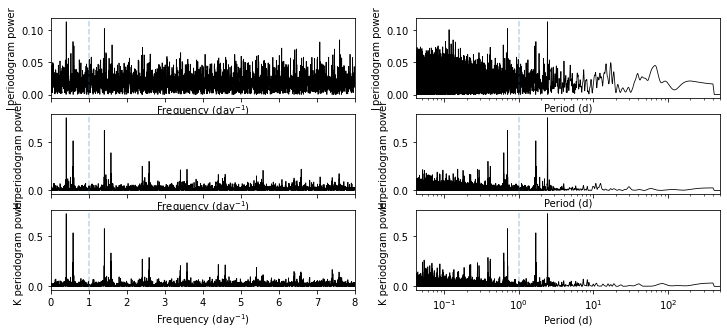

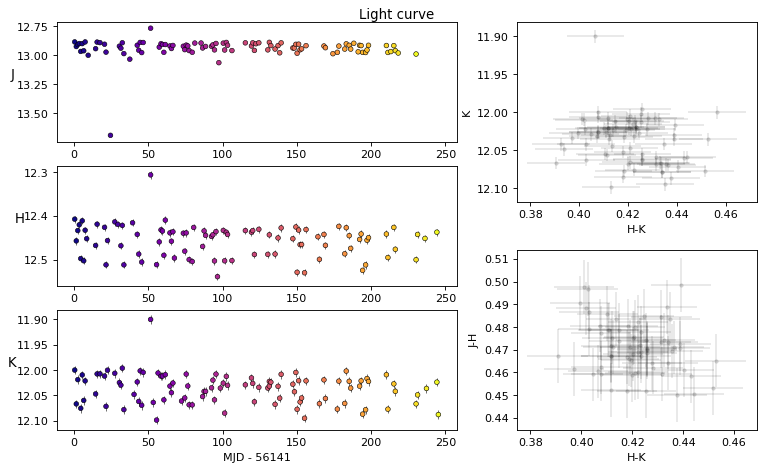

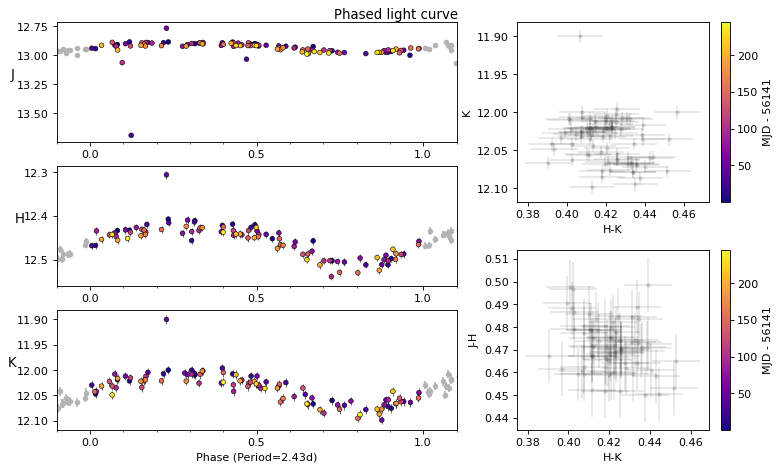



19 SONYC-NGC1333-21 is SID: 4450 8746 0984 03
FAP of J peak: 2.64e-16. Freq: 0.24 day^-1 (Period: 98.44 hours)
FAP of H peak: 1.19e-21. Freq: 0.24 day^-1 (Period: 98.52 hours)
FAP of K peak: 4.39e-32. Freq: 0.24 day^-1 (Period: 98.48 hours)


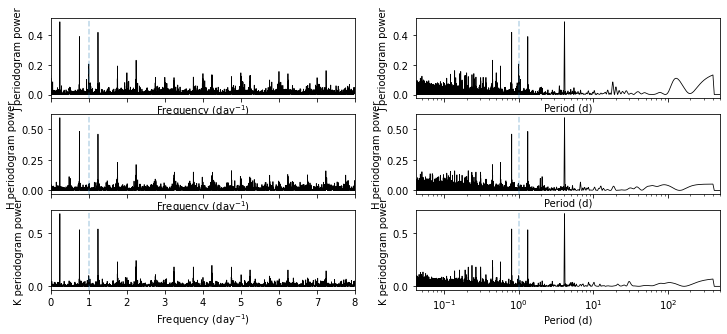

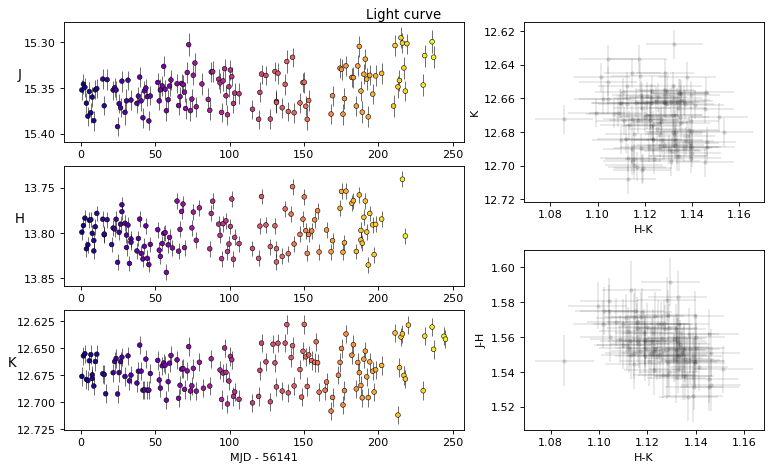

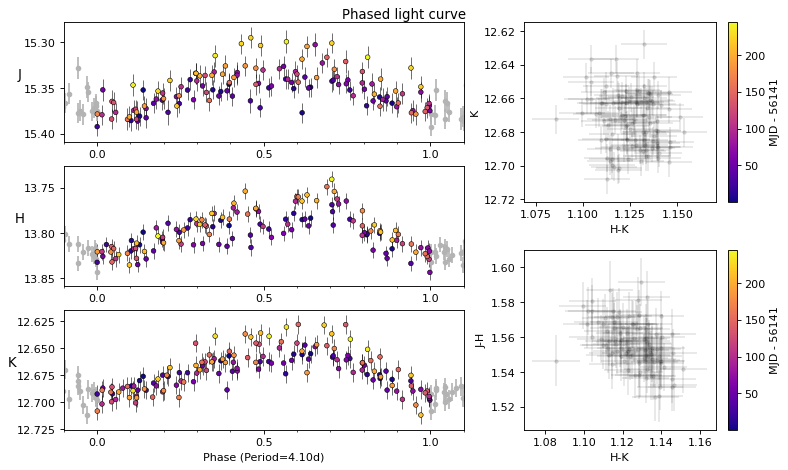



31 Sp49 is SID: 4450 8746 0984 00
FAP of J peak: 9.78e-17. Freq: 0.26 day^-1 (Period: 91.01 hours)
FAP of H peak: 6.90e-12. Freq: 0.26 day^-1 (Period: 91.08 hours)
FAP of K peak: 4.40e-03. Freq: 0.26 day^-1 (Period: 91.15 hours)


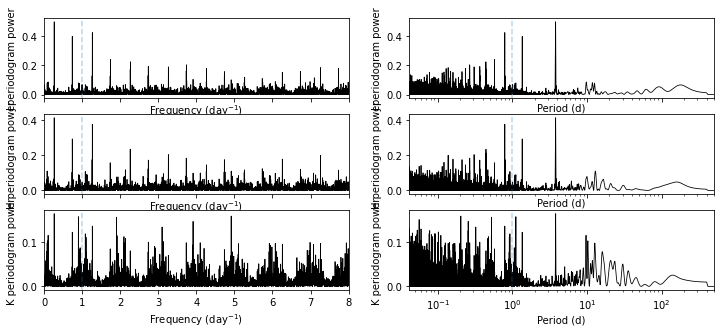

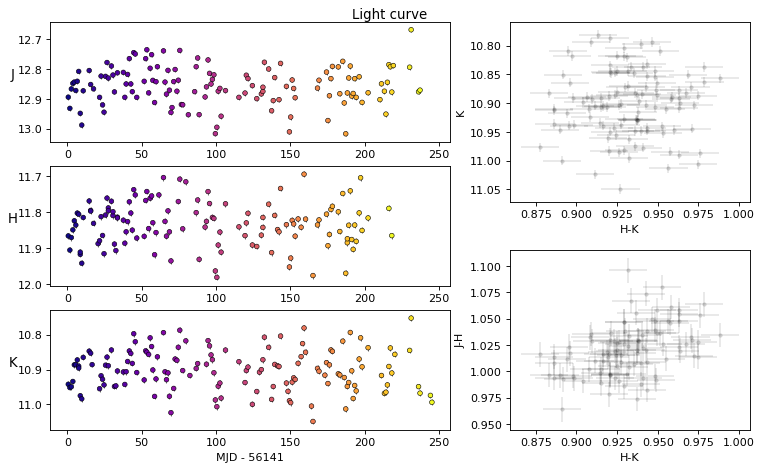

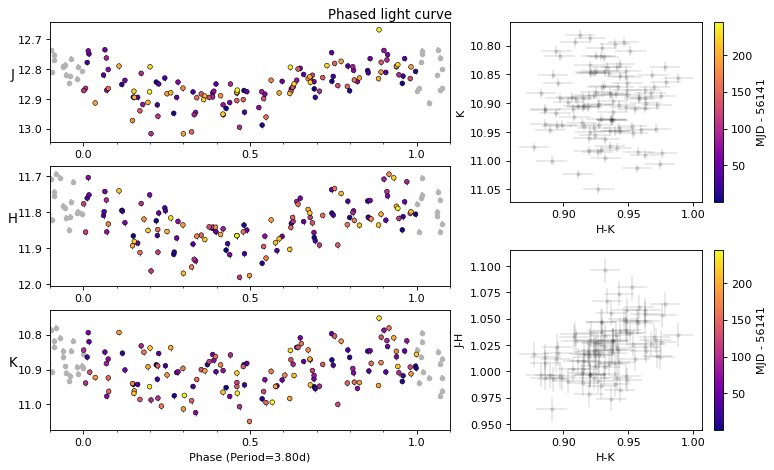



32 Sp53 is SID: 4450 8746 1073 25
FAP of J peak: 9.68e-01. Freq: 15.93 day^-1 (Period: 1.51 hours)
FAP of H peak: 3.11e-10. Freq: 0.44 day^-1 (Period: 54.78 hours)
FAP of K peak: 9.58e-10. Freq: 0.44 day^-1 (Period: 54.76 hours)


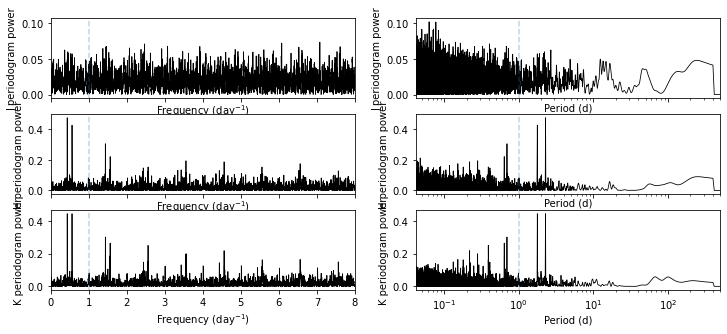

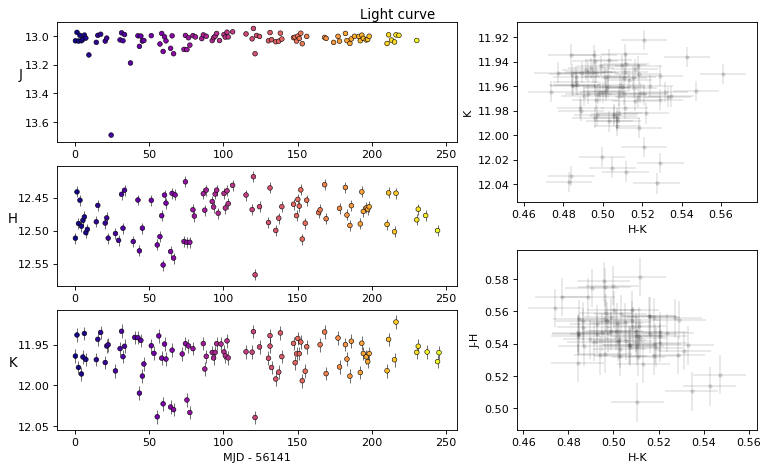

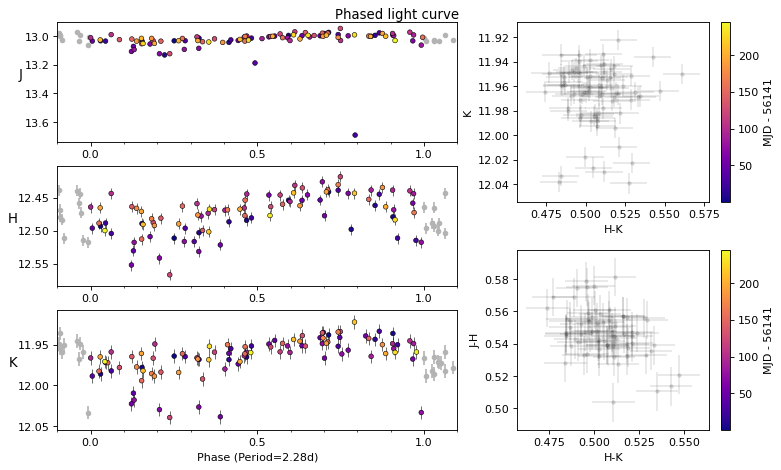



37 Sp131 is SID: 4450 8746 1176 84
FAP of J peak: 6.87e-20. Freq: 0.63 day^-1 (Period: 38.04 hours)
FAP of H peak: 1.10e-21. Freq: 0.63 day^-1 (Period: 38.03 hours)
FAP of K peak: 2.86e-16. Freq: 0.63 day^-1 (Period: 38.04 hours)


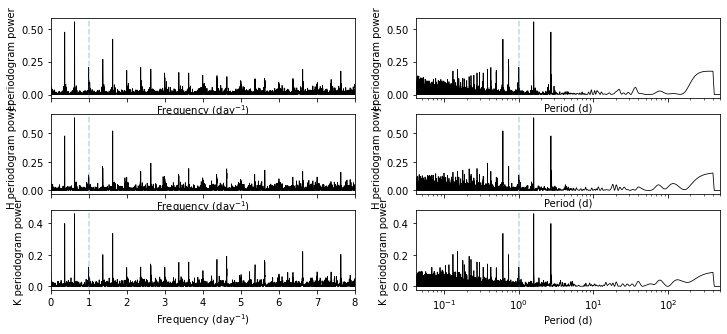

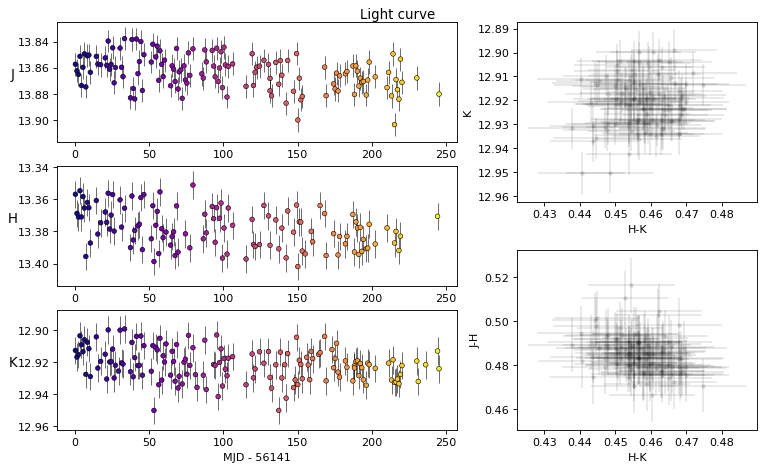

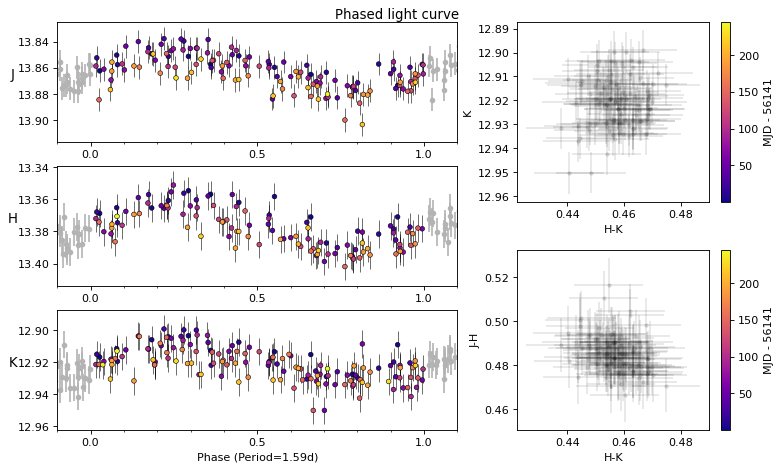



38 Sp157 is SID: 4450 8746 1169 89
FAP of J peak: 2.11e-29. Freq: 0.83 day^-1 (Period: 29.02 hours)
FAP of H peak: 9.78e-37. Freq: 0.83 day^-1 (Period: 29.02 hours)
FAP of K peak: 1.65e-37. Freq: 0.83 day^-1 (Period: 29.03 hours)


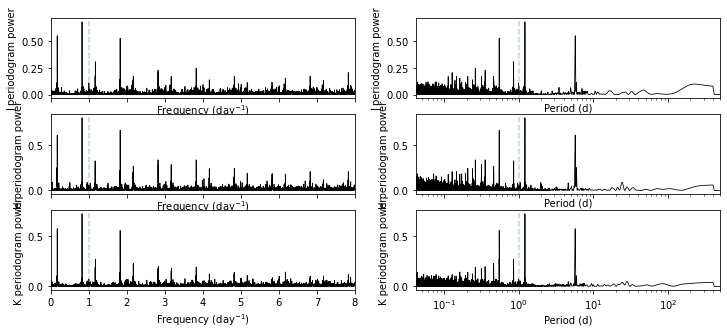

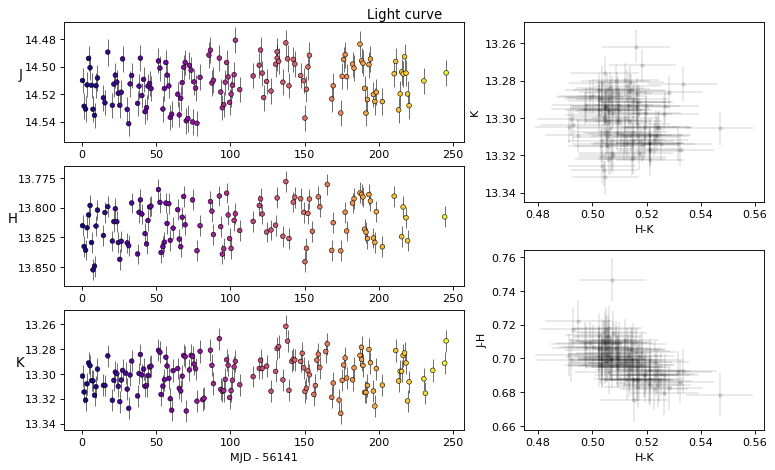

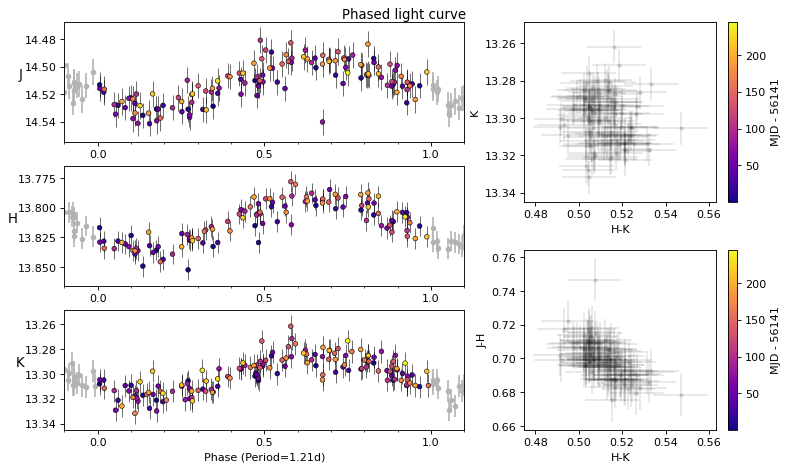



39 Sp177 is SID: 4450 8746 1174 27
FAP of J peak: 1.74e-04. Freq: 1.30 day^-1 (Period: 18.49 hours)
FAP of H peak: 3.70e-07. Freq: 1.30 day^-1 (Period: 18.49 hours)
FAP of K peak: 1.40e-05. Freq: 2.30 day^-1 (Period: 10.44 hours)


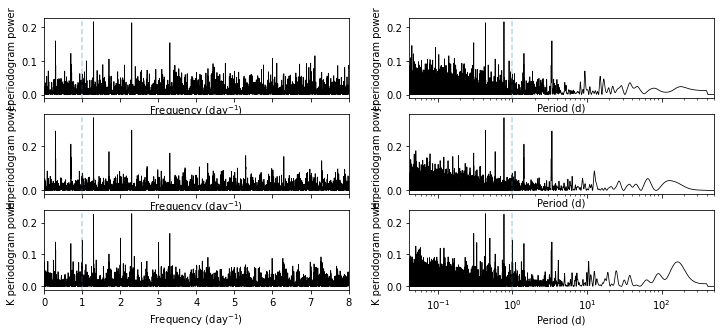

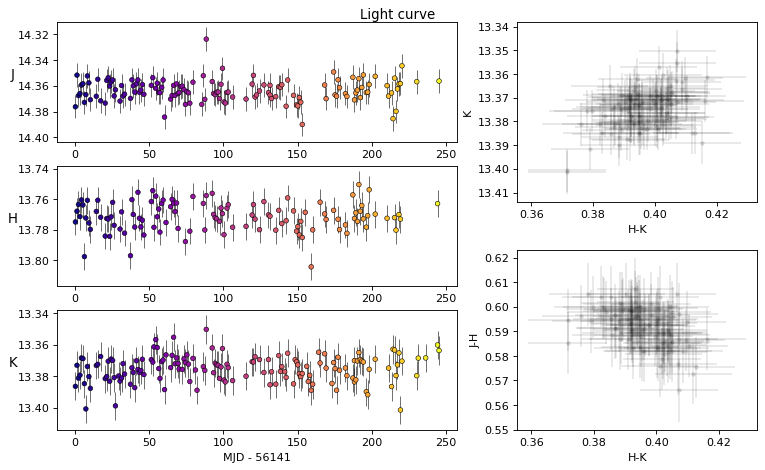

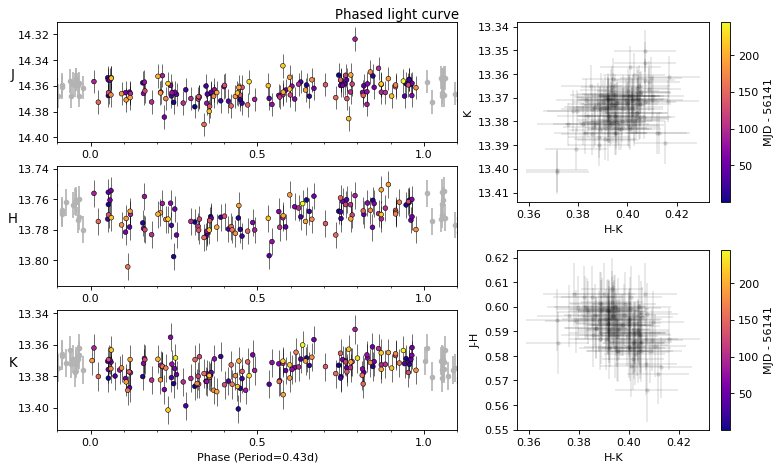



40 Sp71 is SID: 4450 8746 1163 14
FAP of J peak: 2.10e-03. Freq: 16.75 day^-1 (Period: 1.43 hours)
FAP of H peak: 4.71e-03. Freq: 6.12 day^-1 (Period: 3.92 hours)
FAP of K peak: 5.84e-09. Freq: 0.24 day^-1 (Period: 99.26 hours)


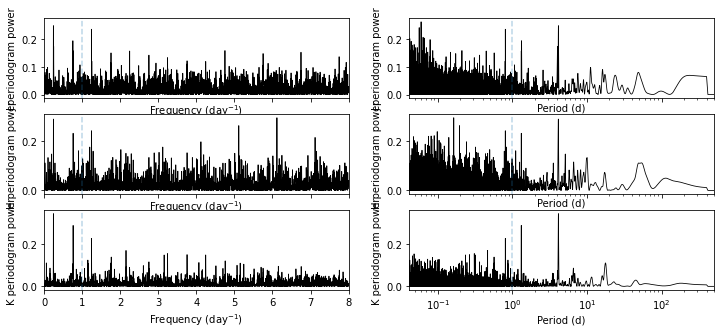

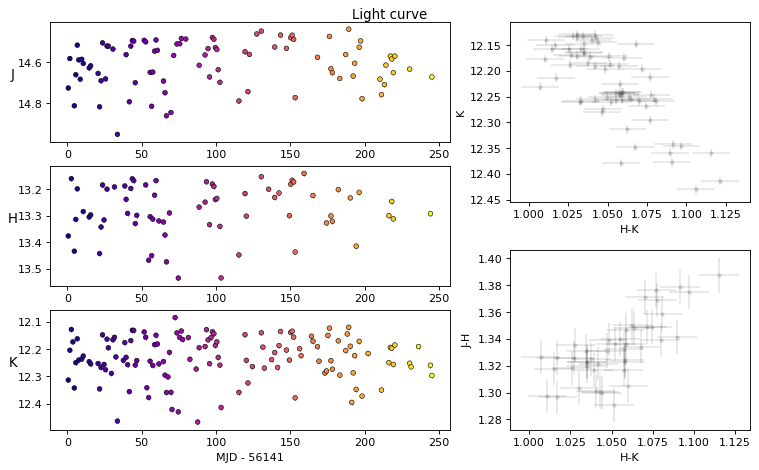

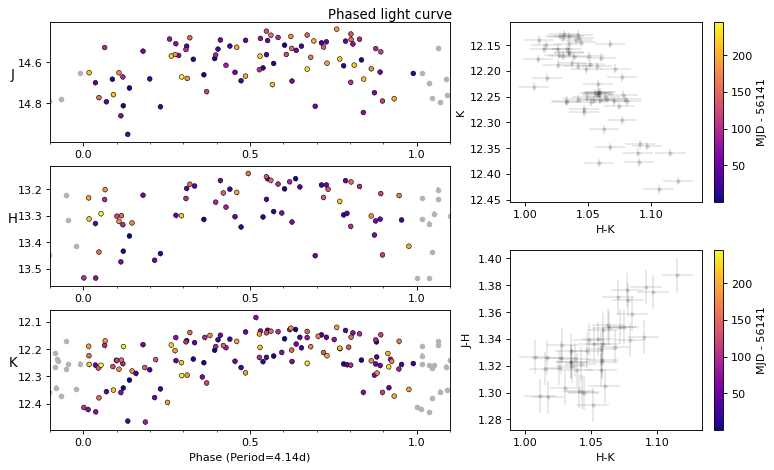

In [85]:
from wuvars.analysis.sidsep import sidsep
from astropy.timeseries import LombScargle
from wuvars.plotting.lightcurve import simple_lc, simple_phased_lc

cmap = 'plasma'

import warnings
warnings.filterwarnings("ignore")

# q2 = sq2(ds, n_min, n_max)
# v2 = sq2_variables(ds, n_min, n_max, Stetson_cutoff=S)

# variable_sids = spread['wserv11'][q2 & v2].index[120:150]
bd_match_sids = w7m.index[idx]

# print(bd_match_sids)

dg = phot_grouped.wserv7

f_min = 0
f_max = 24
N_eval = int(2.4e5)

freq = np.linspace(f_min, f_max, N_eval)

strong_periods_list = [11, 15, 19, 31, 32, 37, 38, 39, 40]

for i, sid in enumerate(bd_match_sids):
    
    if i not in strong_periods_list:
        continue
    
    print(f"\n\n{i} {table['ID'][i]} is SID: {sidsep(sid)}")
        
    # grab the grouped photometry data
    
    dat = dg.groups[dg.groups.keys["SOURCEID"] == sid]

    
    # apply lomb-scargle to J, H, and K
    
    # plot the periodograms.
    
    fig, axes = plt.subplots(nrows=3, ncols=2, sharex='col', figsize=(12,5))
    
    bands = ['J', 'H', 'K']
    
    for (band, (ax, ax_p)) in zip(bands, axes):
                
        dates = dat['MEANMJDOBS'][~np.isnan(dat[f"{band}APERMAG3"])]
        mags = dat[f"{band}APERMAG3"][~np.isnan(dat[f"{band}APERMAG3"])]
        errs = dat[f"{band}APERMAG3ERR"][~np.isnan(dat[f"{band}APERMAG3"])]

        # compute a lomb scargle
        try:
            ls = LombScargle(dates, mags, dy=errs)
            power = ls.power(freq)

            min_freq = 1/400
            power[freq<min_freq] = 0

            # plot it.
            ax.plot(freq, power, 'k', lw=0.8)
            ax.set_xlim(freq.min(), freq.max())
            ax.set_ylabel(f"{band} periodogram power")
            ax.set_xlabel("Frequency (day$^{-1}$)")
            ax.set_xlim(0, 8)
            ax.axvline(1, ls='--', alpha=0.3)

            # plot it.
            ax_p.plot(1/freq, power, 'k', lw=0.8)
            ax_p.set_ylabel(f"{band} periodogram power")
            ax_p.set_xlabel("Period (d)")
            ax_p.set_xscale("log")
            ax_p.set_xlim(1/24, 500)
            ax_p.axvline(1, ls='--', alpha=0.3)


            fmax = freq[np.nanargmax(power)]
            fap = ls.false_alarm_probability(np.nanmax(power))
            print(f"FAP of {band} peak: {fap:.2e}. Freq: {fmax:.2f} day^-1 (Period: {24. / fmax:.2f} hours)")
        except ValueError:
            fmax = 1
#         print(f"Strongest period at {band}: {24. / fmax:.2f} hours")
        
    simple_lc_scatter(dg, sid, begin=56141, cmap=cmap)
    plt.suptitle("Light curve")
    simple_phased_lc_scatter(dg, sid, 1/fmax, begin=56141, cmap=cmap)
    plt.suptitle("Phased light curve")
        
    plt.show()
    
    
    
    
    
    


# sin_mags = mags + np.sin(times*24)

# ls = LombScargle(times, sin_mags)

# # note: this lets the mean float by default
# power = LombScargle(times, sin_mags).power(freq) 
# # freq, power = ls.autopower(minimum_frequency=0, maximum_frequency=35)

# fmax = freq[np.nanargmax(power)]
# print(f"Strongest frequency: {fmax:.2f} day^-1")
# print(f"Strongest period: {24. / fmax:.2f} hours")

In [55]:
dg['MEANMJDOBS'].min()

56141.56834

In [78]:
plt.suptitle?



1 SONYC-NGC1333-2 is SID: 4450 8746 1073 78
FAP of J peak: 1.36e-05. Freq: 0.29 day^-1 (Period: 81.66 hours)
FAP of H peak: 5.82e-10. Freq: 0.29 day^-1 (Period: 81.55 hours)
FAP of K peak: 1.00e-06. Freq: 0.29 day^-1 (Period: 81.49 hours)


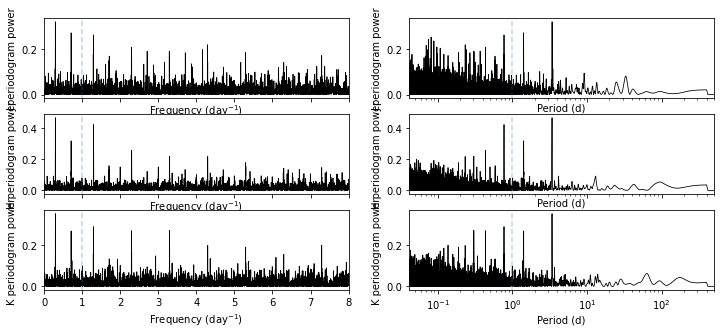

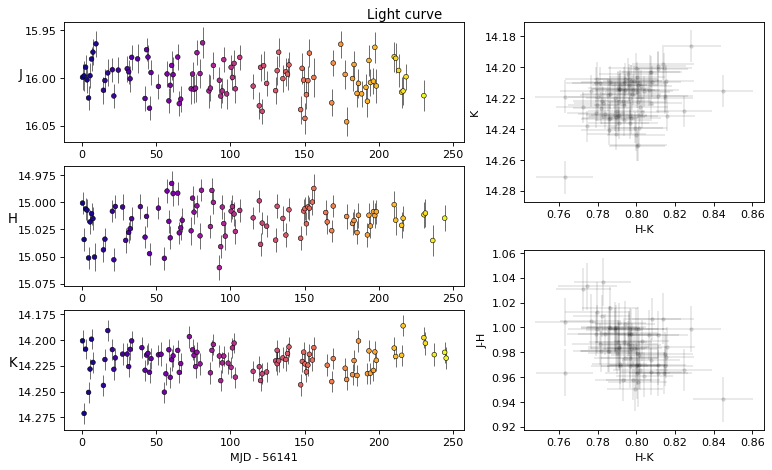

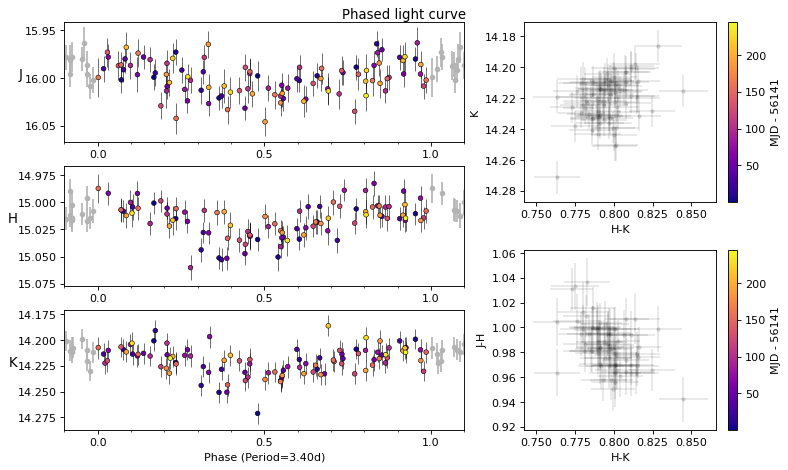



2 SONYC-NGC1333-3 is SID: 4450 8746 1161 77
FAP of J peak: 7.28e-13. Freq: 0.71 day^-1 (Period: 33.94 hours)
FAP of H peak: 3.47e-16. Freq: 0.71 day^-1 (Period: 33.96 hours)
FAP of K peak: 3.21e-08. Freq: 0.71 day^-1 (Period: 33.98 hours)


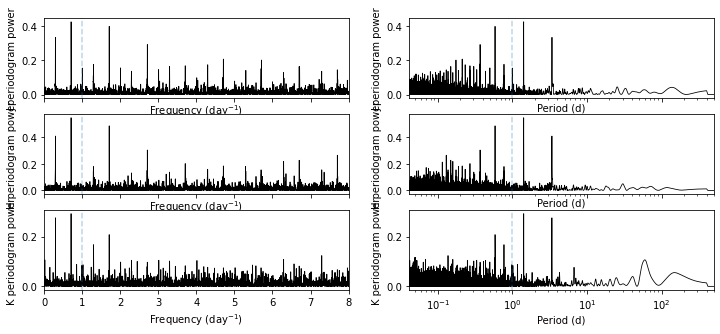

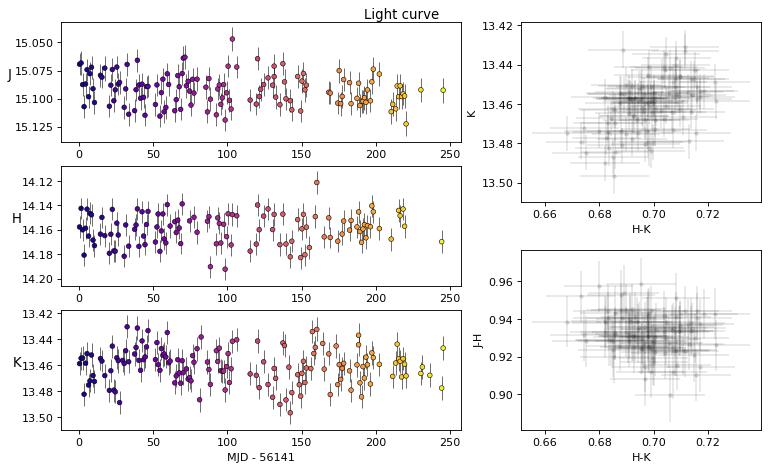

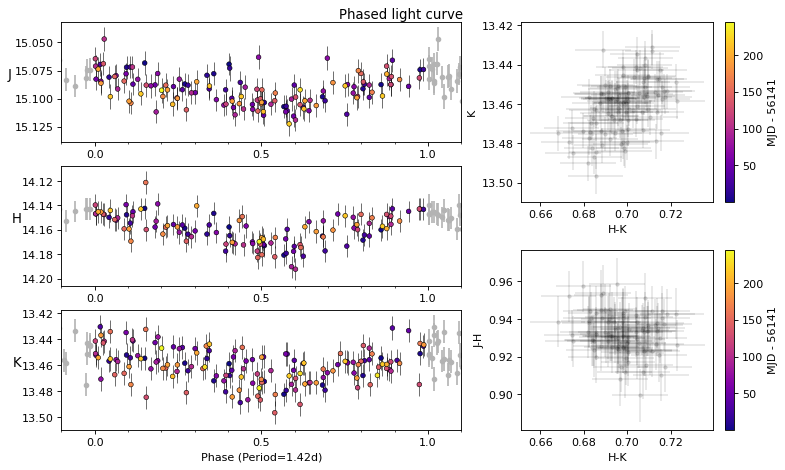



4 SONYC-NGC1333-5 is SID: 4450 8746 1162 43
FAP of J peak: 8.62e-09. Freq: 0.71 day^-1 (Period: 33.74 hours)
FAP of H peak: 2.10e-07. Freq: 0.29 day^-1 (Period: 82.53 hours)
FAP of K peak: 4.11e-05. Freq: 0.29 day^-1 (Period: 82.56 hours)


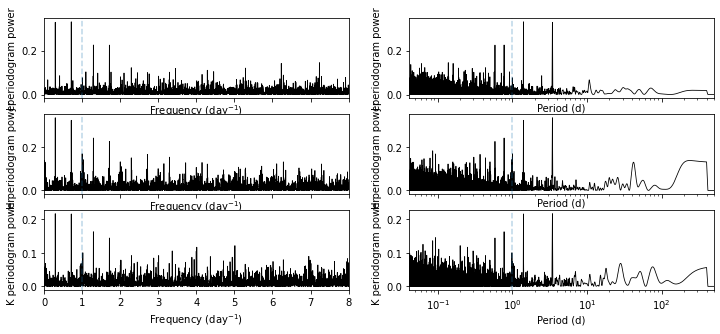

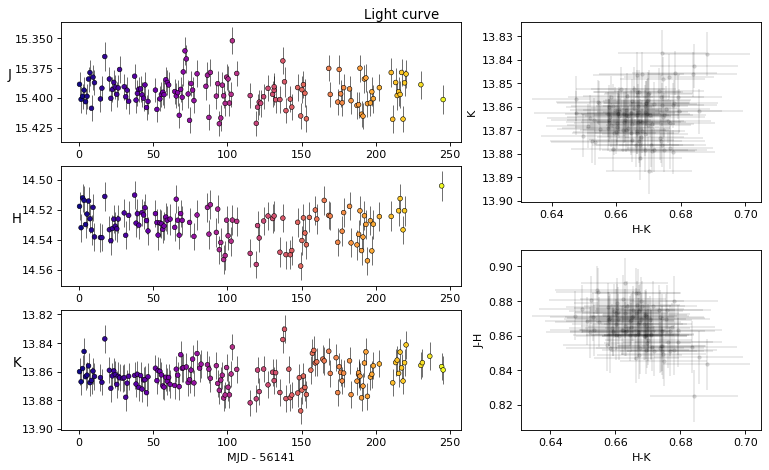

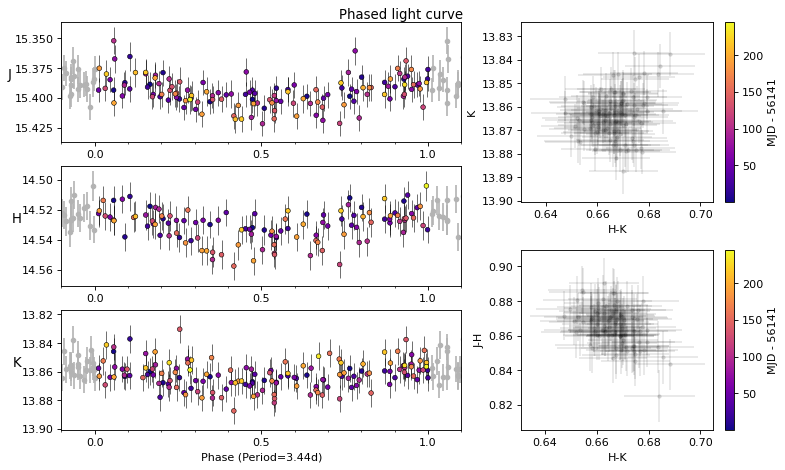



6 SONYC-NGC1333-7 is SID: 4450 8746 1163 16
FAP of J peak: 6.48e-06. Freq: 0.64 day^-1 (Period: 37.27 hours)
FAP of H peak: 1.42e-08. Freq: 0.64 day^-1 (Period: 37.25 hours)
FAP of K peak: 1.34e-06. Freq: 0.64 day^-1 (Period: 37.24 hours)


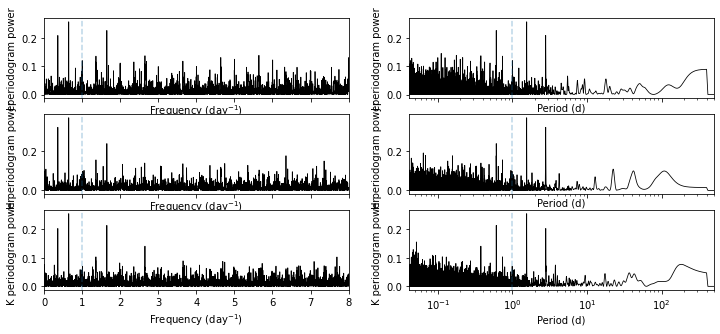

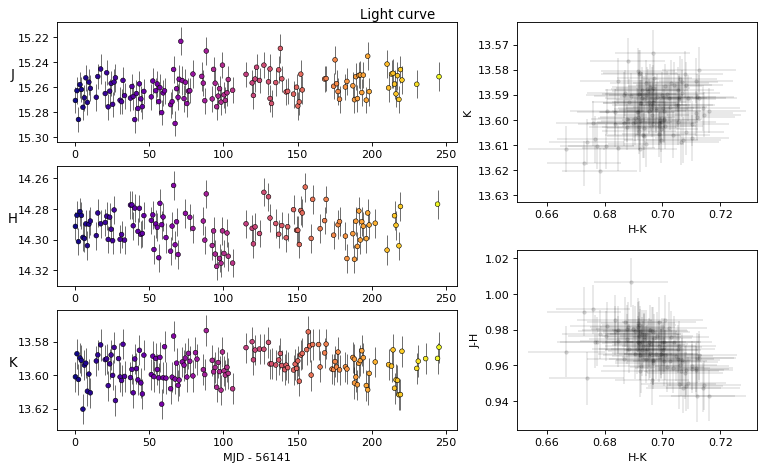

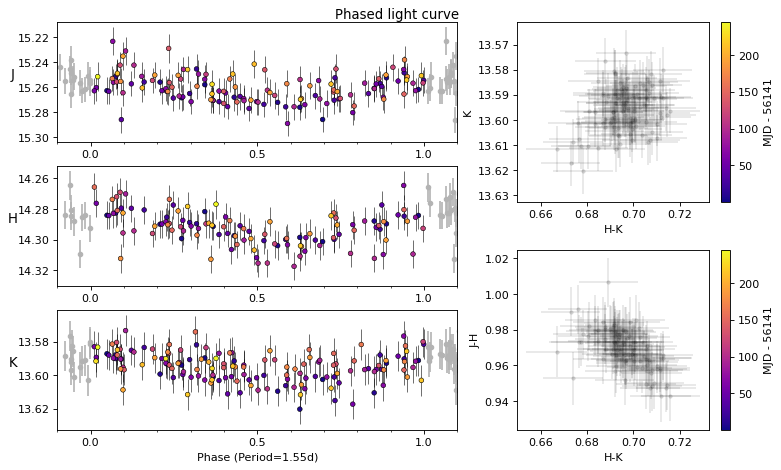



13 SONYC-NGC1333-14 is SID: 4450 8746 1170 35
FAP of J peak: 7.33e-03. Freq: 0.40 day^-1 (Period: 60.70 hours)
FAP of H peak: 1.56e-04. Freq: 0.39 day^-1 (Period: 60.81 hours)
FAP of K peak: 1.01e-02. Freq: 0.40 day^-1 (Period: 60.74 hours)


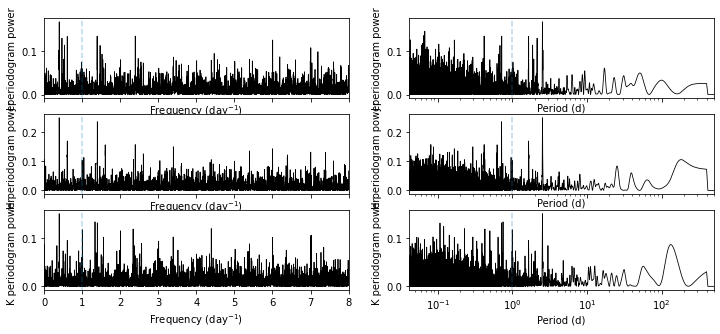

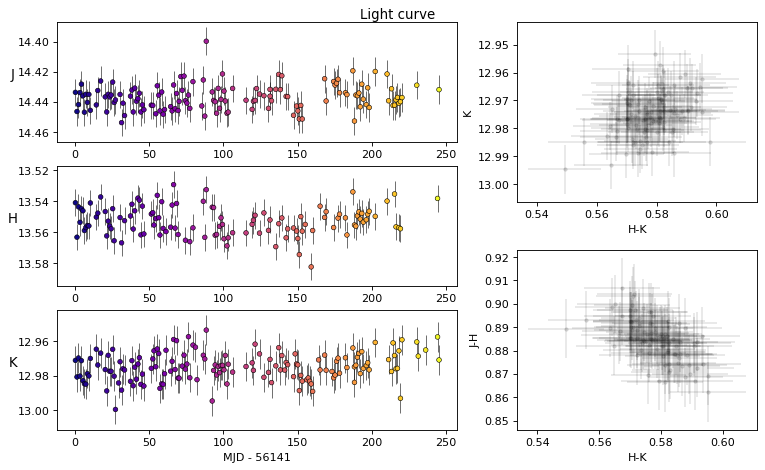

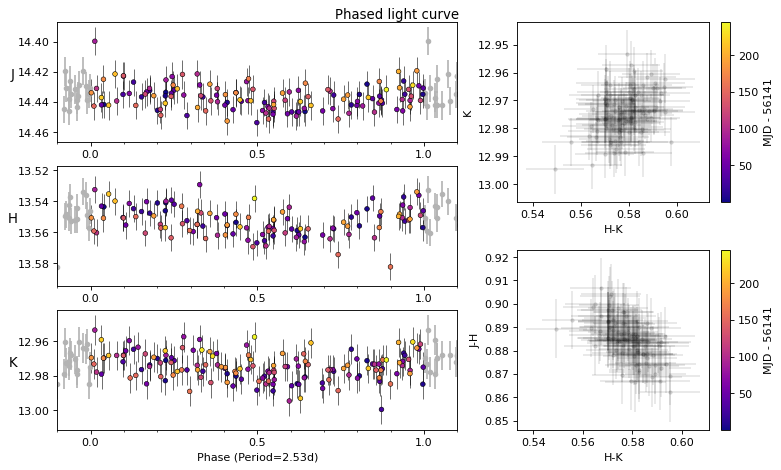



27 ASR8 is SID: 4450 8746 1072 00
FAP of J peak: 1.00e+00. Freq: 7.08 day^-1 (Period: 3.39 hours)
FAP of H peak: 4.42e-04. Freq: 1.23 day^-1 (Period: 19.51 hours)
FAP of K peak: 3.35e-05. Freq: 1.23 day^-1 (Period: 19.50 hours)


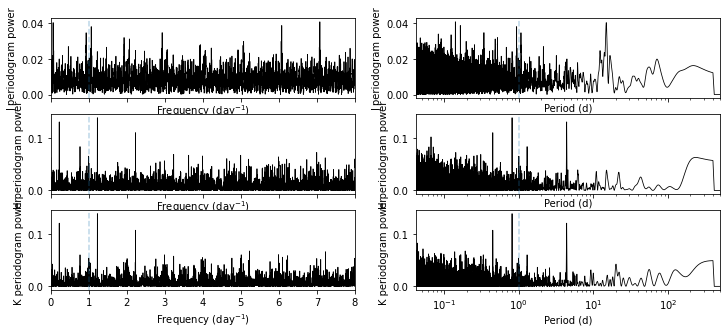

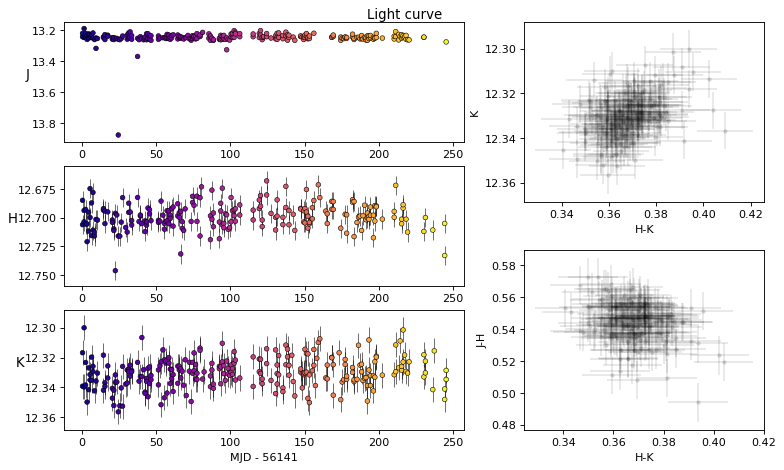

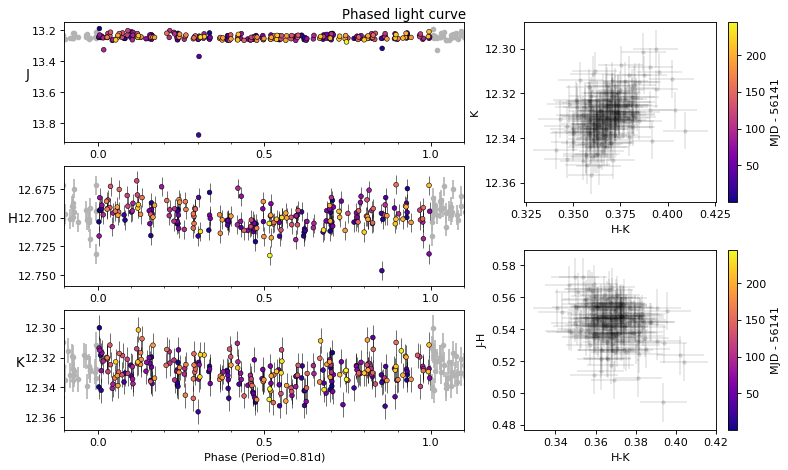



36 Sp105 is SID: 4450 8746 1169 99
FAP of J peak: 1.14e-07. Freq: 0.69 day^-1 (Period: 34.94 hours)
FAP of H peak: 3.13e-09. Freq: 0.32 day^-1 (Period: 75.85 hours)
FAP of K peak: 4.20e-04. Freq: 0.69 day^-1 (Period: 35.01 hours)


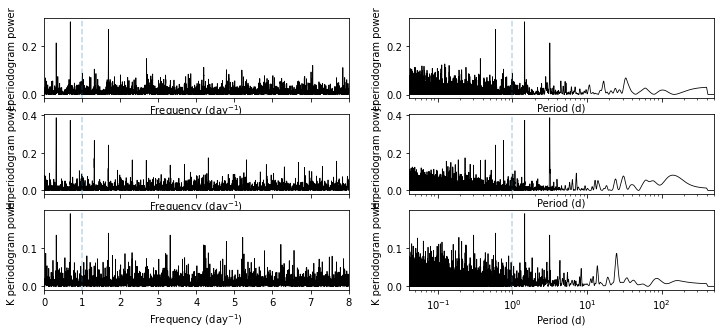

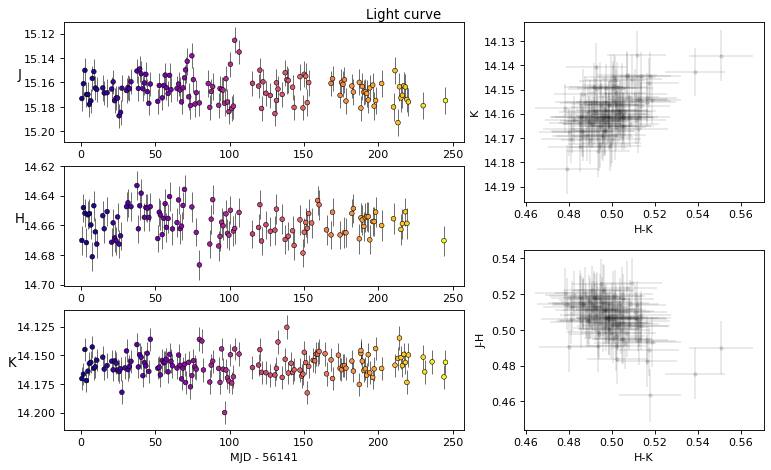

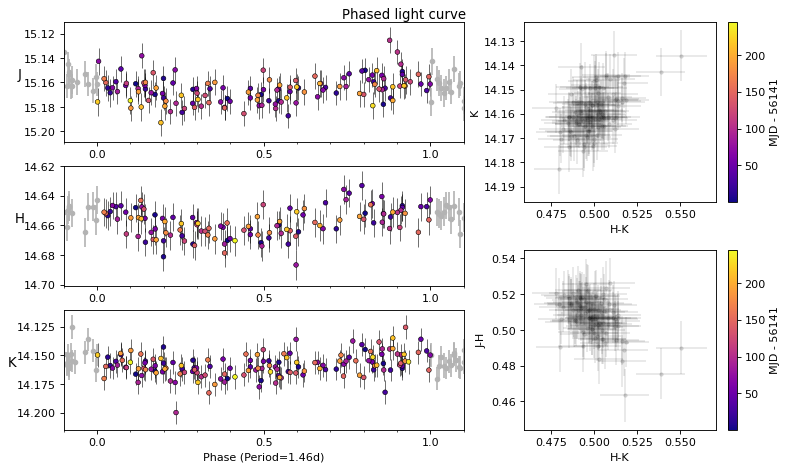

In [86]:
from wuvars.analysis.sidsep import sidsep
from astropy.timeseries import LombScargle
from wuvars.plotting.lightcurve import simple_lc, simple_phased_lc

cmap = 'plasma'

import warnings
warnings.filterwarnings("ignore")

# q2 = sq2(ds, n_min, n_max)
# v2 = sq2_variables(ds, n_min, n_max, Stetson_cutoff=S)

# variable_sids = spread['wserv11'][q2 & v2].index[120:150]
bd_match_sids = w7m.index[idx]

# print(bd_match_sids)

dg = phot_grouped.wserv7

f_min = 0
f_max = 24
N_eval = int(2.4e5)

freq = np.linspace(f_min, f_max, N_eval)

strong_periods_list = [1, 2, 4, 6, 13, 27, 36]

for i, sid in enumerate(bd_match_sids):
    
    if i not in strong_periods_list:
        continue
    
    print(f"\n\n{i} {table['ID'][i]} is SID: {sidsep(sid)}")
        
    # grab the grouped photometry data
    
    dat = dg.groups[dg.groups.keys["SOURCEID"] == sid]

    
    # apply lomb-scargle to J, H, and K
    
    # plot the periodograms.
    
    fig, axes = plt.subplots(nrows=3, ncols=2, sharex='col', figsize=(12,5))
    
    bands = ['J', 'H', 'K']
    
    for (band, (ax, ax_p)) in zip(bands, axes):
                
        dates = dat['MEANMJDOBS'][~np.isnan(dat[f"{band}APERMAG3"])]
        mags = dat[f"{band}APERMAG3"][~np.isnan(dat[f"{band}APERMAG3"])]
        errs = dat[f"{band}APERMAG3ERR"][~np.isnan(dat[f"{band}APERMAG3"])]

        # compute a lomb scargle
        try:
            ls = LombScargle(dates, mags, dy=errs)
            power = ls.power(freq)

            min_freq = 1/400
            power[freq<min_freq] = 0

            # plot it.
            ax.plot(freq, power, 'k', lw=0.8)
            ax.set_xlim(freq.min(), freq.max())
            ax.set_ylabel(f"{band} periodogram power")
            ax.set_xlabel("Frequency (day$^{-1}$)")
            ax.set_xlim(0, 8)
            ax.axvline(1, ls='--', alpha=0.3)

            # plot it.
            ax_p.plot(1/freq, power, 'k', lw=0.8)
            ax_p.set_ylabel(f"{band} periodogram power")
            ax_p.set_xlabel("Period (d)")
            ax_p.set_xscale("log")
            ax_p.set_xlim(1/24, 500)
            ax_p.axvline(1, ls='--', alpha=0.3)


            fmax = freq[np.nanargmax(power)]
            fap = ls.false_alarm_probability(np.nanmax(power))
            print(f"FAP of {band} peak: {fap:.2e}. Freq: {fmax:.2f} day^-1 (Period: {24. / fmax:.2f} hours)")
        except ValueError:
            fmax = 1
#         print(f"Strongest period at {band}: {24. / fmax:.2f} hours")
        
    simple_lc_scatter(dg, sid, begin=56141, cmap=cmap)
    plt.suptitle("Light curve")
    simple_phased_lc_scatter(dg, sid, 1/fmax, begin=56141, cmap=cmap)
    plt.suptitle("Phased light curve")
        
    plt.show()
    
    
    
    
    
    


# sin_mags = mags + np.sin(times*24)

# ls = LombScargle(times, sin_mags)

# # note: this lets the mean float by default
# power = LombScargle(times, sin_mags).power(freq) 
# # freq, power = ls.autopower(minimum_frequency=0, maximum_frequency=35)

# fmax = freq[np.nanargmax(power)]
# print(f"Strongest frequency: {fmax:.2f} day^-1")
# print(f"Strongest period: {24. / fmax:.2f} hours")

In [87]:
dg

<Table length=2319765>
   SOURCEID      MEANMJDOBS          RA         ...   HGRADE     KGRADE  
    int64         float64         float64       ...  float32    float32  
-------------- ------------- ------------------ ... ---------- ----------
44508746088477 56262.4593667 0.9106514928459505 ... 0.99568963 0.98870057
44508746088477   56380.22276 0.9106519229268102 ... 0.42857143  0.6472222
44508746088478 56243.5687467 0.9065698755040442 ... 0.96344084  0.9915014
44508746088478   56248.35115 0.9065705903310388 ...        0.0        0.0
44508746088482 56240.5163467 0.9065605806640652 ...  0.9892009  0.9942857
44508746088482 56243.5687467 0.9065610056025867 ... 0.96344084  0.9915014
44508746088482 56260.4843233 0.9065628864169245 ...   0.995671   0.982808
44508746088482   56261.34525 0.9065620742994498 ...   0.995671  0.9971671
44508746088482   56301.20267 0.9065623319942238 ...  0.9784483 0.97707736
44508746088484 56316.2637633 0.9106433821483509 ... 0.96328294  0.9745763
           ...           ...                ... ...        ...        ...
44508746139158 56337.2751333 0.9073227913083205 ...  0.9742389  0.9939394
44508746139158 56338.2315767 0.9073227506503536 ... 0.96926713  0.9878049
44508746139174 56178.6278533 0.9072502869903032 ...  0.9810427  0.9909091
44508746139174   56181.48961 0.9072498817529951 ...   0.990566  0.9969789
44508746139174 56234.5409633 0.9072502335633359 ...   0.992891   0.993921
44508746139174 56238.5333067 0.9072497235808639 ...  0.9811321  0.9787879
44508746139174 56256.3711167 0.9072498281046631 ...  0.9952941  0.9939394
44508746139174 56335.2758233  0.907250469738082 ... 0.98578197  0.9939577
44508746139200 56240.5174933 0.9070556054281905 ... 0.98345155  0.9787234
44508746139200 56283.3460567 0.9070565646368179 ...  0.9811321  0.9939577